## Industria azucarera con diferenciacion ordinaria y estacional

##### Oscar Julian Layton

La información relativa a la producción de algunos bienes del sector industrial en Colombia desde el año 1995 hasta la fecha, los datos son proporcionados por el banco de la república en mediciones mensuales a través de la variable de producción real a nivel nacional, incluyendo algunos bienes como Azucar, cemento gris, Lingotes de acero y producción de carbón. Para hacer un análisis de serie de tiempo, se usa la serie perteneciente al **sector azucarero en Colombia** el cual es medido en toneladas por mes.

Con el objetivo de destablecer una secuencia de pasos para el analisis de la serie de tiempo, Se hace necesario el uso de **R** como herramienta computacional, en un primer paso se necesitaran de las siguientes librerias las cuales ayudaran para cargar los datos. 

In [13]:
library(readr)
library(readxl)
industriacol <- read_excel("C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\series de tiempo\\codigos\\industriadsd1995.xls")

Teniendo en cuenta que la información de la producción azucarera se identifica que hace parte de mediciones mensuales desde febrero de 1995 hasta el 16 de marzo de 2016, de esta forma se procede a conviertir la informacion en un objeto de series de tiempo con la por medio de la funcion ts de R, indicando el periodo de inicio y la frecuencia de las mediciones los cuales son (1995,2) febrero de 1995 con una frecuencia de 12. A continuación se presentan los primeros 24 observaciones.

In [3]:
azucar=ts(industriacol['Azucar'],start=c(1995,2),frequency=12) #frec:periodicidad, comienza en 1949
head(azucar,24)

[1] 186151 188408 123473 170266 168927 182420 199119 189389 163727 158211
[11] 147899 166172 168295 174564 112499 172187 165433 199514 227164 216748
[21] 204366 190076 152205 130083

No obstante, se procede a realizar las serie de tiempo, según las especificaiones anteriores:

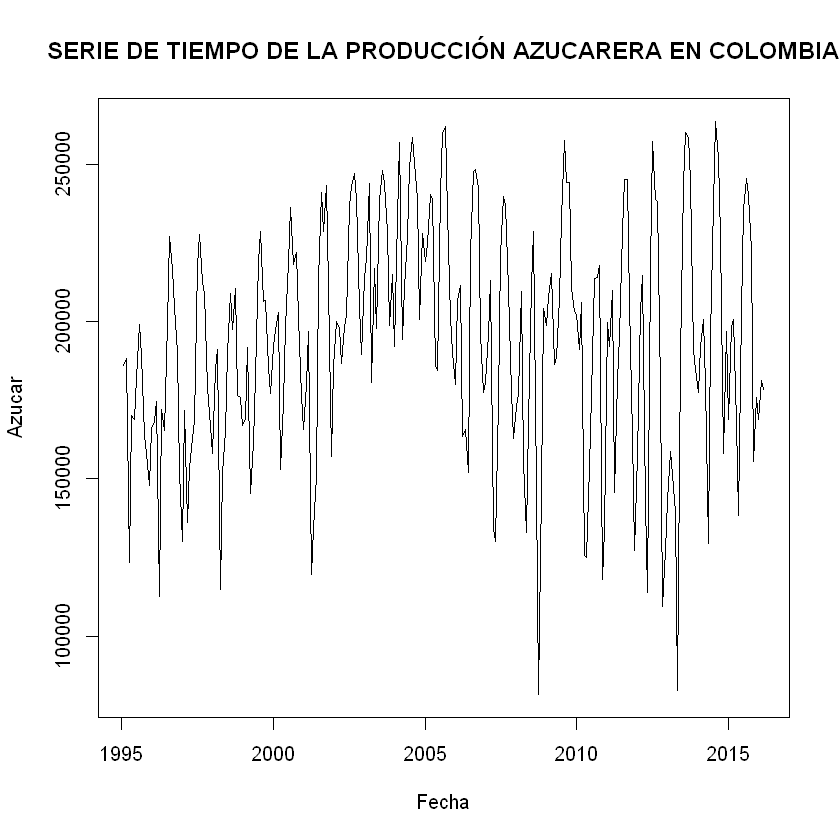

In [4]:
plot(azucar, main="SERIE DE TIEMPO DE LA PRODUCCIÓN AZUCARERA EN COLOMBIA", xlab="Fecha")

## Descomposicion basada en diferenciación

Para el proceso estocastico deterimnado por la producción de azucar $\{  X_t \}$ no estacionario, existen diversas estrategias para convertirlo en un proceso $\{  Y_t \}$ estacionario, se propone desarrollar el metodo de descomposicion basado en diferenciacion el cual consiste en transformar los datos $\{  X_t \}$ eliminando las componentes $M_t$ y $S _t$, aqui llamaremos a $M_t$ el componente de tendencia, a $S_t$ la componente estacional, la filosofia consiste en transformar los datos de tal manera que se eliminen los componentes  y de esta manera convertir al proceso $\{  X_t \}$ que es no estacionario  en $Y_t$ el cual es estacionario.

### Desarrollo

En referencia a la serie de tiempo, a primera vista se logra observar que a traves del tiempo la varianza alcanza a aumentar un poco, dado lo anterior se ve la necesidad de buscar metodologias para identificar si existe la no estabilidad en la varianza, en este orden de ideas si fuese necesario se usara la transformacion **Box-Cox** el cual transforma los datos de la serie segun un lambda especifico el cual logre homogeneizar la varianza, dicha transformacion tiene la forma:


$$
f_x(U_t)=\left\{\begin{matrix}
 \lambda^-1 (U^{\lambda}_t - 1) & U_t\geq 0 & \lambda>0\\ 
Ln (U_t) & U_t >0 & \lambda=0
\end{matrix}\right.
$$


Este procedimiento puede ser usado rapidamente en R, sin embargo el determinar si dicha transformacion debe ser usada se identifica el $\lambda$ por medio del siguiente codigo:

In [3]:
library(forecast)
forecast::BoxCox.lambda(azucar, method = "guerrero", lower = 0, upper = 2)   

[1] 1.999959

Por consiguiente el valor de lambda es cercano a 1,  en este orden de ideas lo mas aconsejable es no realizar una transformacion a los datos, en otras palabras no es necesario estabilizar la varianza:


## Descomposicion basada en diferenciación

Como segundo paso, se realiza propiamente el proceso basado en diferenciación

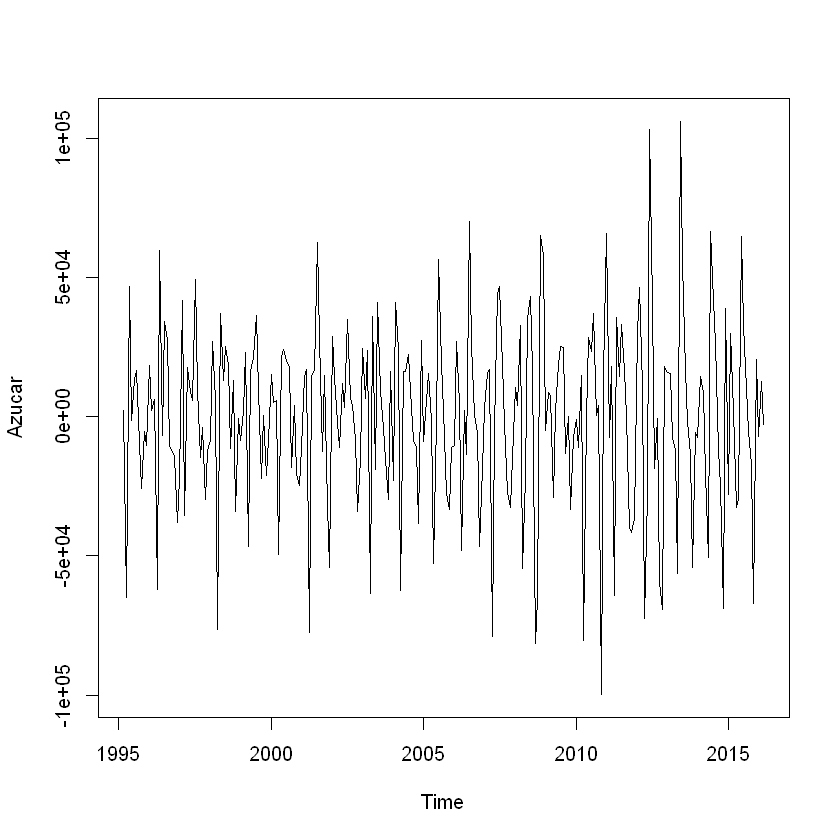

In [4]:
SerieA=diff(azucar,lag=1,)###Diferencia Ordinaria
plot(SerieA)

En la grafica anterior puede observarse el resumen del proceso de descomposicion realizado absado en diferenciación ordinaria, elcual intenta eliminar la componente de tendencia $M_t$. Observese la funcion de autocorrelacion simple dada la descomposición ordinaria.

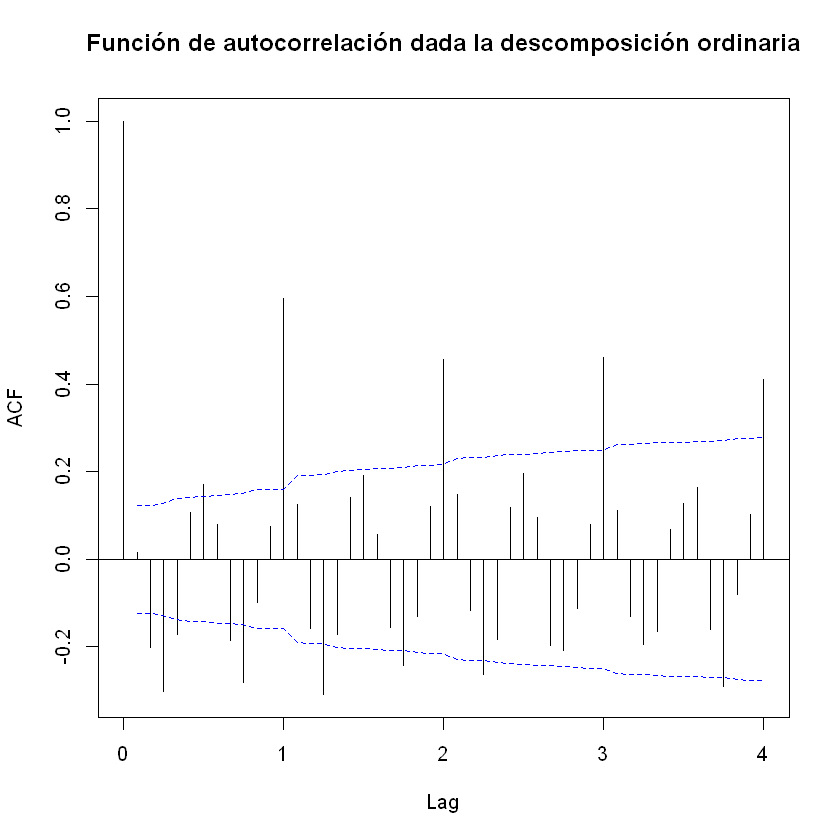

In [5]:
acf(SerieA,ci.type="ma",lag.max=48,main="Función de autocorrelación dada la descomposición ordinaria")

Considerando al anterior acf se puede observar que todavía existe una estacionariedad en la serie, con lo cual se opta por generar la diferenciación estacional considerando 12 periodos anteriores (12 es el periodo de la compponente estacional):

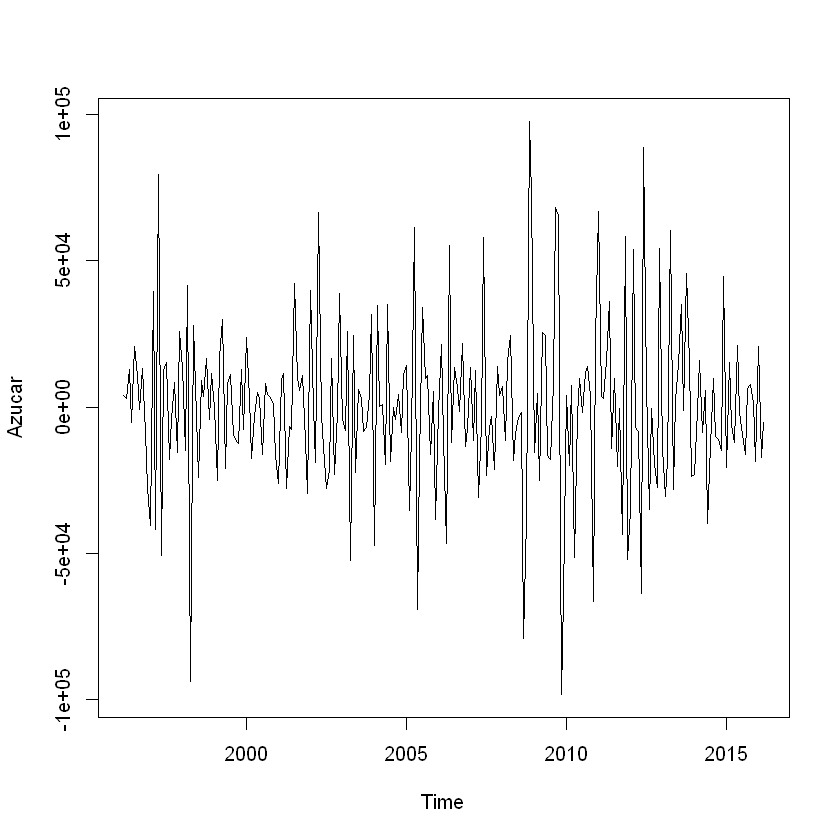

In [6]:
SerieB=diff(SerieA,lag=12) #####Diferencia Estacional
plot(SerieB)

La anterior gráfica muestra la serie estacionaria resulatnte $y_t$ a la cual se le ha realizado el proceso de descomposición basado en diferenciación ordinaria y estacional. A continuación se presenta la funcion de autocorrelacion simple para el proceso resultante:

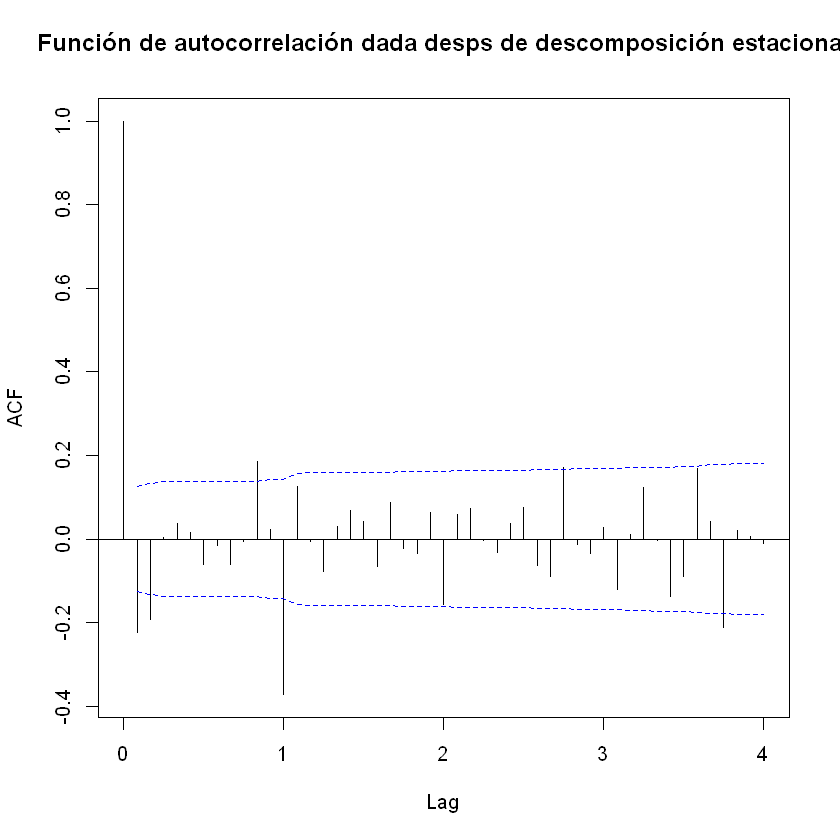

In [7]:
acf(SerieB,ci.type="ma",lag.max=48,main="Función de autocorrelación dada desps de descomposición estacional")

En la grafica de la función de autocorrelación simple puede observarse que solamente para el rezago 12 la correlacion se sale de las bandas de confianza lo que indica que es significativa para el proceso, es decir no es cero. Finalmente el proceso realizado para volver una serie de tiempo a una estacionaria es buena, el modelo para la serie estaría determinado por un modelo estacional ARMA(p,q)


## Análisis de la serie resultante estacionaria

Dado el proceso de descomposición basado en diferenciación generado anteriormente, el modelo resultante al ser estacionario puede ser estimado por medio de un ARMA(p,q). Por consiguiente se procede a graficar las funciones de autocorrelación simple y parcial

In [9]:
library(forecast)
library(lmtest) 


Al observar la acf y pacf se observa que los datos tienen componente autorregresiva y promedios móviles mixta, puesto que ninfuna de las dos: funcion de autocorrelaci´pon simple y funcion de autocorrelacion parcial no se van rápidamente para cero (rezagos altos de ellas son significativos). Con respecto a la función de autocorrelación simple, presentadda en la grafica anterior se logra observar que los rezagos 1,2,10,12 salen de las bandas movibles esto significa que son significativamente diferentes de cero, no obstante el rezago 12 es el último lo cual implica que el proceso que generó los datos puede ser modelado por medio de un MA(12). Observemos la gráfica de la función de autocorrelación parcial.

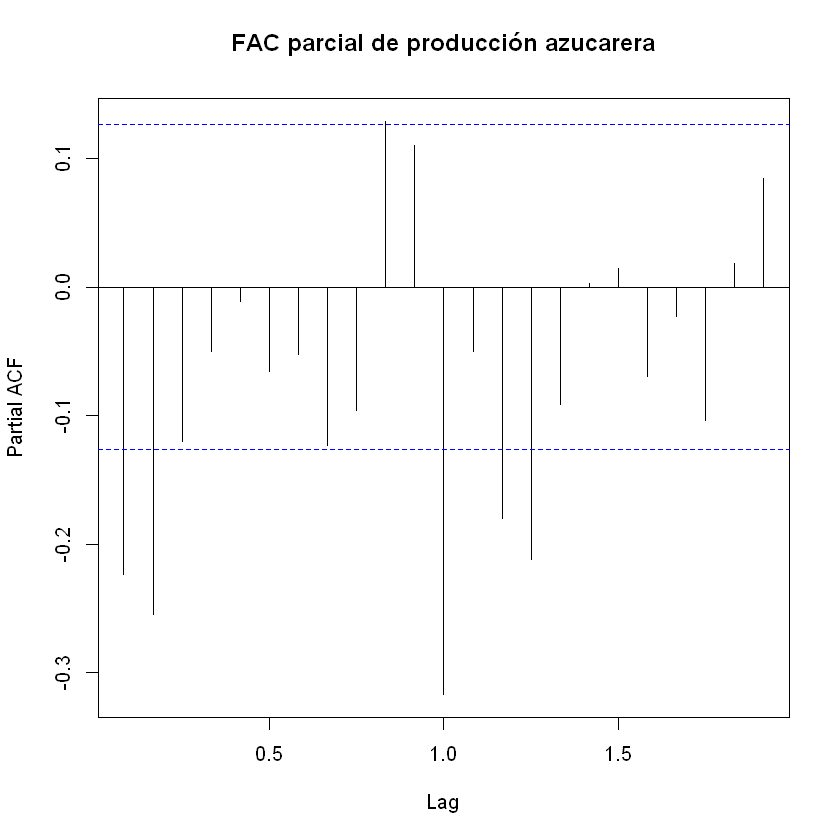

In [10]:
pacf(SerieB,main="FAC parcial de producción azucarera") 

En la anterior gráfica se observa que las autocorrelaciones parciales de rezago mayores a 15 son no significativas y las anteriores significativas esto indica que los datos posiblemente provienen de un proceso AR(15). Todo esto para poner en marcha un análisis por medio de criterios de información y seleccionar un modelo que se ajuste a la serie minimizando dicho criterio, en este caso se hará referencia al **BIC**.

Teniendo en cuenta que los máximos valores posibles de p y q están dados por $p=15$ y $q=12$

In [11]:
salidaAR15=arima(SerieB,order=c(15,0,0))
salidaMA12=arima(SerieB,order=c(0,0,12))
salidaAR15
salidaMA12 


Call:
arima(x = SerieB, order = c(15, 0, 0))

Coefficients:
          ar1      ar2      ar3      ar4      ar5      ar6      ar7      ar8
      -0.3738  -0.3388  -0.2294  -0.1011  -0.0931  -0.2017  -0.1686  -0.1801
s.e.   0.0629   0.0650   0.0676   0.0635   0.0636   0.0644   0.0652   0.0646
          ar9    ar10     ar11     ar12     ar13     ar14     ar15  intercept
      -0.1202  0.0217  -0.0524  -0.4049  -0.1749  -0.2578  -0.2101   -40.7177
s.e.   0.0646  0.0637   0.0636   0.0630   0.0676   0.0651   0.0640   401.4516

sigma^2 estimated as 558830492:  log likelihood = -2770.61,  aic = 5575.23


Call:
arima(x = SerieB, order = c(0, 0, 12))

Coefficients:
          ma1      ma2      ma3     ma4     ma5     ma6      ma7      ma8
      -0.1732  -0.0873  -0.0426  0.0403  0.0844  0.1450  -0.1261  -0.1050
s.e.   0.0602   0.0664   0.0463  0.0637  0.0619  0.0683   0.0578   0.0652
          ma9    ma10    ma11     ma12  intercept
      -0.0537  0.0964  0.0017  -0.7798   -34.1405
s.e.   0.0460  0.0577  0.0665   0.0638   182.9598

sigma^2 estimated as 4.87e+08:  log likelihood = -2762.25,  aic = 5552.51

In [12]:
salidaAR15fixed=Arima(SerieB,order=c(12,0,0),include.mean = FALSE,fixed=c(NA,0,0,0,0,0,0,0,0,0,0,NA),method = c("CSS-ML"))
coeftest(salidaAR15fixed)
salidaAR15fixed
#attributes(salidaAR15fixed)


z test of coefficients:

      Estimate Std. Error z value  Pr(>|z|)    
ar1  -0.213084   0.057589 -3.7001 0.0002155 ***
ar12 -0.362523   0.057100 -6.3489 2.168e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Series: SerieB 
ARIMA(12,0,0) with zero mean 

Coefficients:
          ar1  ar2  ar3  ar4  ar5  ar6  ar7  ar8  ar9  ar10  ar11     ar12
      -0.2131    0    0    0    0    0    0    0    0     0     0  -0.3625
s.e.   0.0576    0    0    0    0    0    0    0    0     0     0   0.0571

sigma^2 estimated as 679414005:  log likelihood=-2792.46
AIC=5590.92   AICc=5591.02   BIC=5601.38


## Referencias

BANREP. _Producción de algunos bienes de la industria (Mensual desde 1995)_, disponible en http://www.banrep.gov.co/es/produccion